# Vizalition SmartPhone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

## Load Data 

In [3]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\FullDataAct.csv')

In [4]:
dataFrame.head()

Unnamed: 0            timestamp    pressure  index_activity activity  \
0           0  2017-06-29 09:57:00  963.265417             0.0      Eat   
1           1  2017-06-29 09:57:30  963.210350             0.0      Eat   
2           2  2017-06-29 09:58:00  963.377710             0.0      Eat   
3           3  2017-06-29 09:58:30  963.352867             0.0      Eat   
4           4  2017-06-29 09:59:00  963.356162             0.0      Eat   

   step_detector   audio_mic_1  audio_mic_2  audio_mic_3  audio_mic_4  ...  \
0            1.0  10406.766667  7549.982757      32767.0         45.0  ...   
1            1.0  11927.200000  7563.650340      32767.0         45.0  ...   
2            1.0   9694.366667  7582.004297      32767.0         45.0  ...   
3            1.0   7590.000000  7579.942257      32767.0         45.0  ...   
4            1.0  11810.733333  7589.977663      32767.0         45.0  ...   

   gyroscope_Y  gyroscope_Z  magnetometer_X  magnetometer_Y  magnetometer_Z  \
0     0.346604    -0.281238      -37.803840        0.284590        4.949073   
1    -0.568192     0.018634      -34.885090      -10.494576        7.990740   
2    -0.180258    -0.001961      -27.762173       -9.277909       -3.415510   
3    -0.142885    -0.176842      -23.574674      -13.215409       18.199073   
4    -0.428465    -0.343290      -11.147591       -8.746659       -4.144677   

   step_counter  light  number_of_devices_wifi  battery  bluetooth  
0          25.0    0.5                    47.0      NaN        3.0  
1          45.0    0.4                    46.0     81.0        2.0  
2          32.0    2.0                    56.0      NaN        2.0  
3           8.0    2.0                    57.0      NaN        2.0  
4          45.0    2.0                    55.0      NaN        2.0  

[5 rows x 29 columns]

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4897 non-null   int64  
 1   timestamp               4897 non-null   object 
 2   pressure                4896 non-null   float64
 3   index_activity          4897 non-null   float64
 4   activity                4897 non-null   object 
 5   step_detector           1619 non-null   float64
 6   audio_mic_1             4897 non-null   float64
 7   audio_mic_2             4897 non-null   float64
 8   audio_mic_3             4897 non-null   float64
 9   audio_mic_4             4897 non-null   float64
 10  gravity                 4896 non-null   float64
 11  linear_acceleration     4896 non-null   float64
 12  orientation_X           4896 non-null   float64
 13  orientation_Y           4896 non-null   float64
 14  orientation_Z           4896 non-null   

Now, we remove unrelevant columns

In [7]:
FeaturesTable = dataFrame.drop(columns=['Unnamed: 0','timestamp','index_activity','activity'])
FeaturesTable.head()

pressure  step_detector   audio_mic_1  audio_mic_2  audio_mic_3  \
0  963.265417            1.0  10406.766667  7549.982757      32767.0   
1  963.210350            1.0  11927.200000  7563.650340      32767.0   
2  963.377710            1.0   9694.366667  7582.004297      32767.0   
3  963.352867            1.0   7590.000000  7579.942257      32767.0   
4  963.356162            1.0  11810.733333  7589.977663      32767.0   

   audio_mic_4   gravity  linear_acceleration  orientation_X  orientation_Y  \
0         45.0  9.531679             0.923338      30.077025      49.339932   
1         45.0  9.428560             2.384370      22.952714      60.453024   
2         45.0  9.495720             1.978390      43.617109      81.183346   
3         45.0  9.548030             1.396605       4.632983      75.299680   
4         45.0  9.502039             5.458737     -32.125872      65.046507   

   ...  gyroscope_Y  gyroscope_Z  magnetometer_X  magnetometer_Y  \
0  ...     0.346604    -0.281238      -37.803840        0.284590   
1  ...    -0.568192     0.018634      -34.885090      -10.494576   
2  ...    -0.180258    -0.001961      -27.762173       -9.277909   
3  ...    -0.142885    -0.176842      -23.574674      -13.215409   
4  ...    -0.428465    -0.343290      -11.147591       -8.746659   

   magnetometer_Z  step_counter  light  number_of_devices_wifi  battery  \
0        4.949073          25.0    0.5                    47.0      NaN   
1        7.990740          45.0    0.4                    46.0     81.0   
2       -3.415510          32.0    2.0                    56.0      NaN   
3       18.199073           8.0    2.0                    57.0      NaN   
4       -4.144677          45.0    2.0                    55.0      NaN   

   bluetooth  
0        3.0  
1        2.0  
2        2.0  
3        2.0  
4        2.0  

[5 rows x 25 columns]

Preparing the 'y' data:

In [8]:
label = dataFrame['activity']
label.unique()

array(['Eat', 'Walk', 'In computer', 'Sleep', 'Video games', 'Picnic ',
       'Meeting', 'Cooking', 'Movie', 'Pause'], dtype=object)

### Data and labels visualizations:

In computer    1247
Walk           1008
Picnic          620
Pause           413
Eat             392
Video games     278
Meeting         274
Cooking         242
Movie           214
Sleep           209
Name: activity, dtype: int64

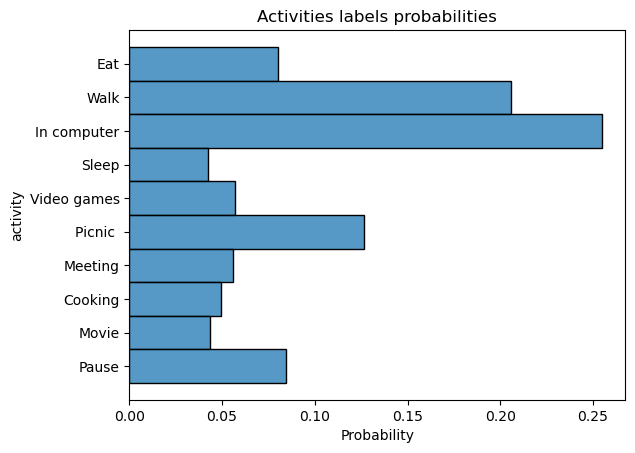

In [9]:
sns.histplot(dataFrame, y="activity", stat="probability")
plt.title('Activities labels probabilities')
dataFrame["activity"].value_counts()



In [10]:
# Drop some features to easy the pairplot
FeaturesTable_lessFeatures = dataFrame.copy(deep=True)
print(f"Feature list: {dataFrame.columns}")
FeaturesTable_lessFeatures = FeaturesTable_lessFeatures.drop(columns=['Unnamed: 0','timestamp','index_activity',
                                                                      "audio_mic_3", "audio_mic_4", 
                                                                      'orientation_Y', 'orientation_Z',
                                                                      'accelerometer_Y', 'accelerometer_Z',
                                                                      'gyroscope_Y', 'gyroscope_Z',
                                                                      'magnetometer_Y', 'magnetometer_Z', 'step_counter'])
print(f"Feature list After removing features: {FeaturesTable_lessFeatures.columns}")

Feature list: Index(['Unnamed: 0', 'timestamp', 'pressure', 'index_activity', 'activity',
       'step_detector', 'audio_mic_1', 'audio_mic_2', 'audio_mic_3',
       'audio_mic_4', 'gravity', 'linear_acceleration', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'accelerometer_X', 'accelerometer_Y',
       'accelerometer_Z', 'gyroscope_X', 'gyroscope_Y', 'gyroscope_Z',
       'magnetometer_X', 'magnetometer_Y', 'magnetometer_Z', 'step_counter',
       'light', 'number_of_devices_wifi', 'battery', 'bluetooth'],
      dtype='object')
Feature list After removing features: Index(['pressure', 'activity', 'step_detector', 'audio_mic_1', 'audio_mic_2',
       'gravity', 'linear_acceleration', 'orientation_X', 'accelerometer_X',
       'gyroscope_X', 'magnetometer_X', 'light', 'number_of_devices_wifi',
       'battery', 'bluetooth'],
      dtype='object')


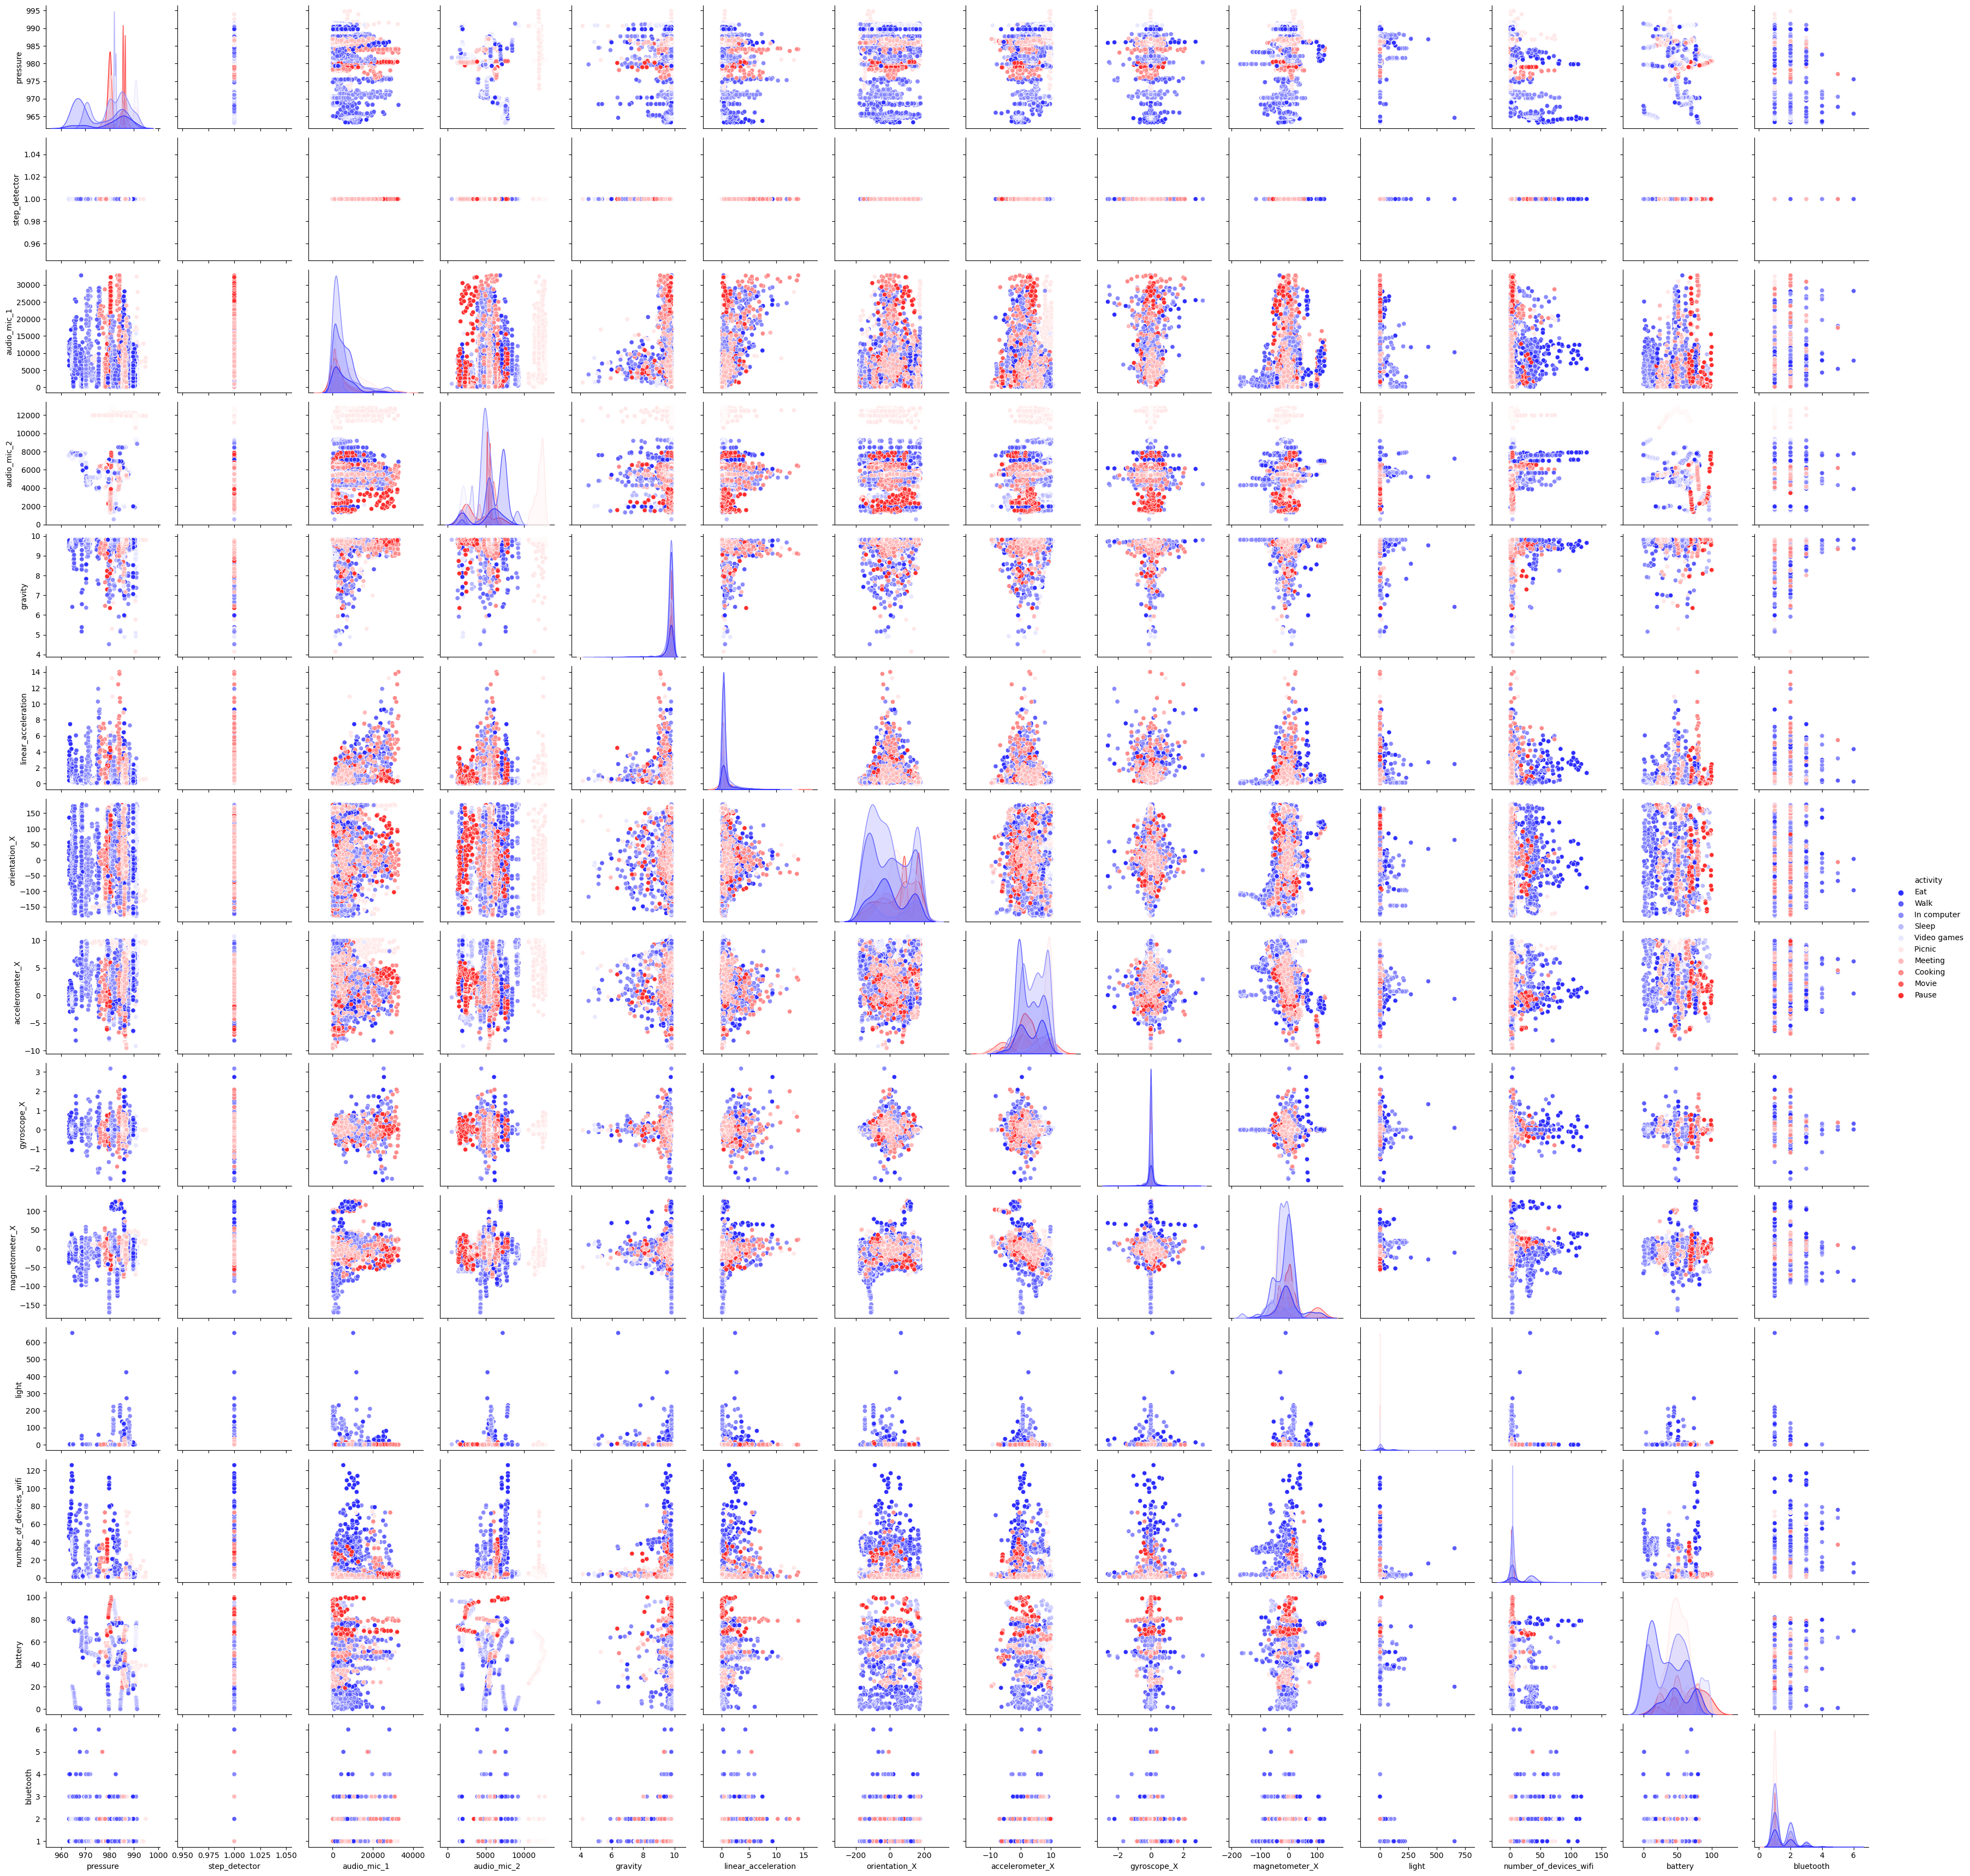

In [11]:
sns.pairplot(FeaturesTable_lessFeatures, hue='activity', palette='bwr')

## Plot fetures as function of time

In [14]:
import plotly.express as px
fig= px.scatter(data_frame= dataFrame,  x=None, y='pressure', color='activity', title='Pressure as a function of time and activity')

fig.show()

In [15]:
fig= px.scatter(data_frame= dataFrame,  x=None, y='audio_mic_2', color='activity',title='Audio Mic 2 as a function of time and activity')
fig.show()

### Measurments as a function of time

Text(0.5, 1.0, 'Step Detector as function of time')

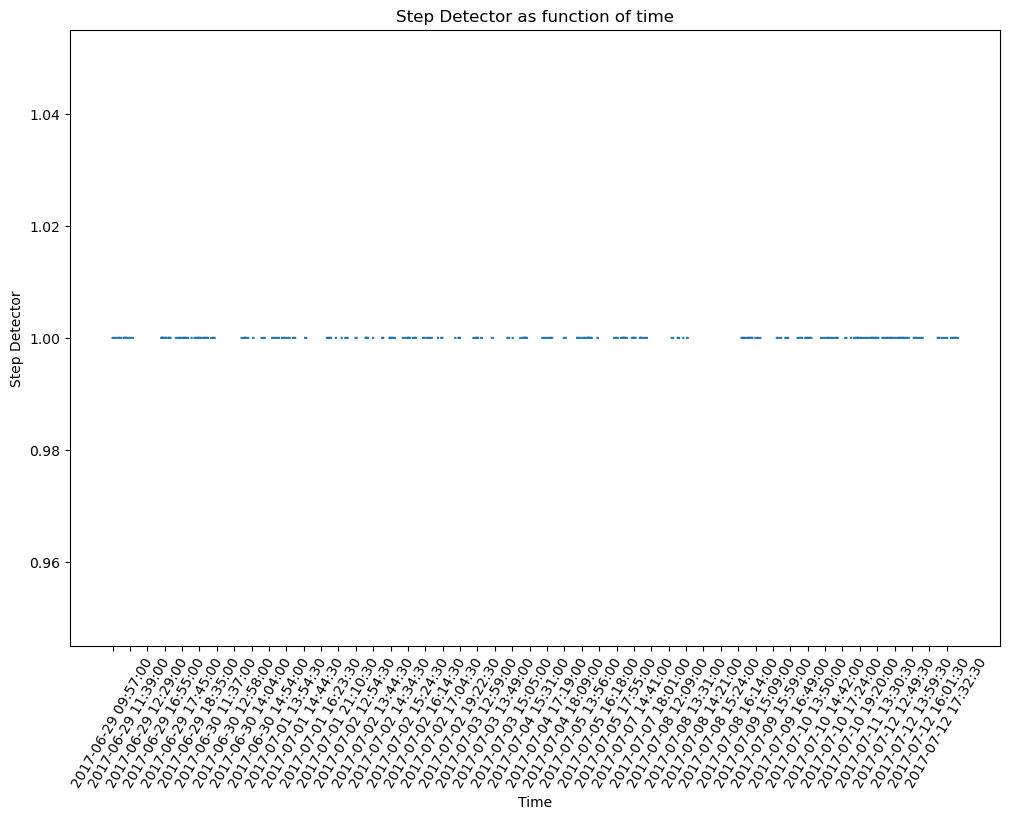

In [24]:

plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['step_detector'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Step Detector')
plt.title('Step Detector as function of time')

Text(0.5, 1.0, 'Audio Mic 1 as function of time')

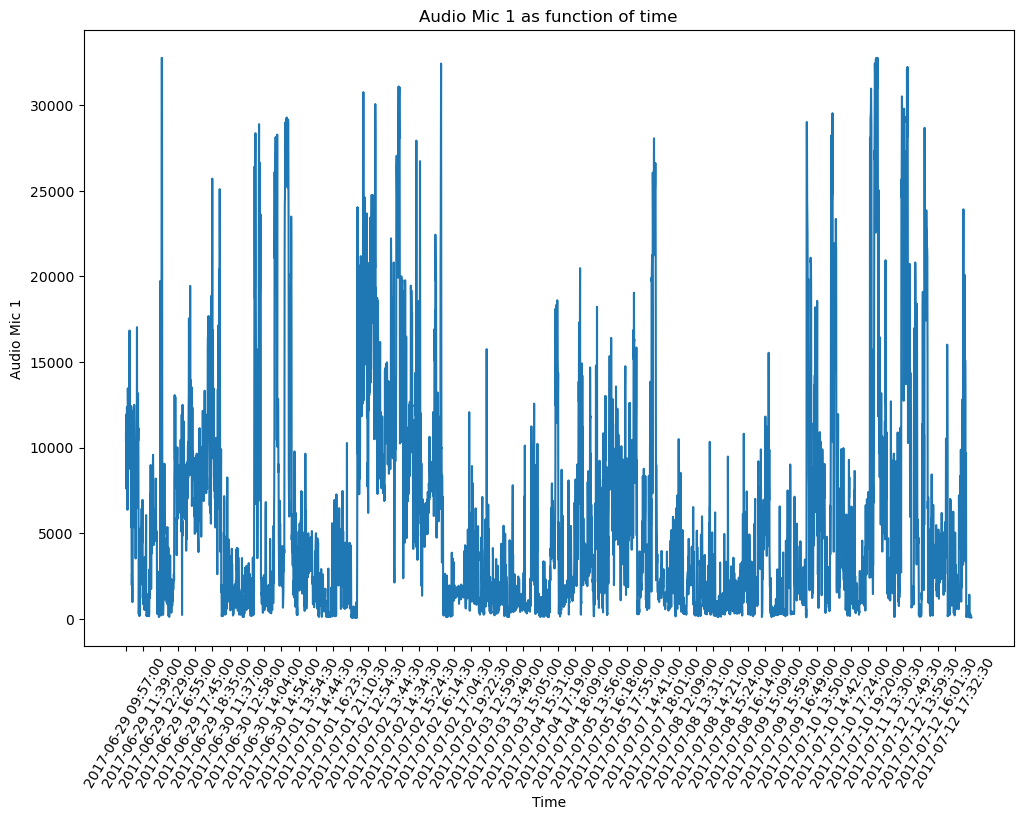

In [25]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['audio_mic_1'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Audio Mic 1')
plt.title('Audio Mic 1 as function of time')

Text(0.5, 1.0, 'Audio Mic 2 as function of time')

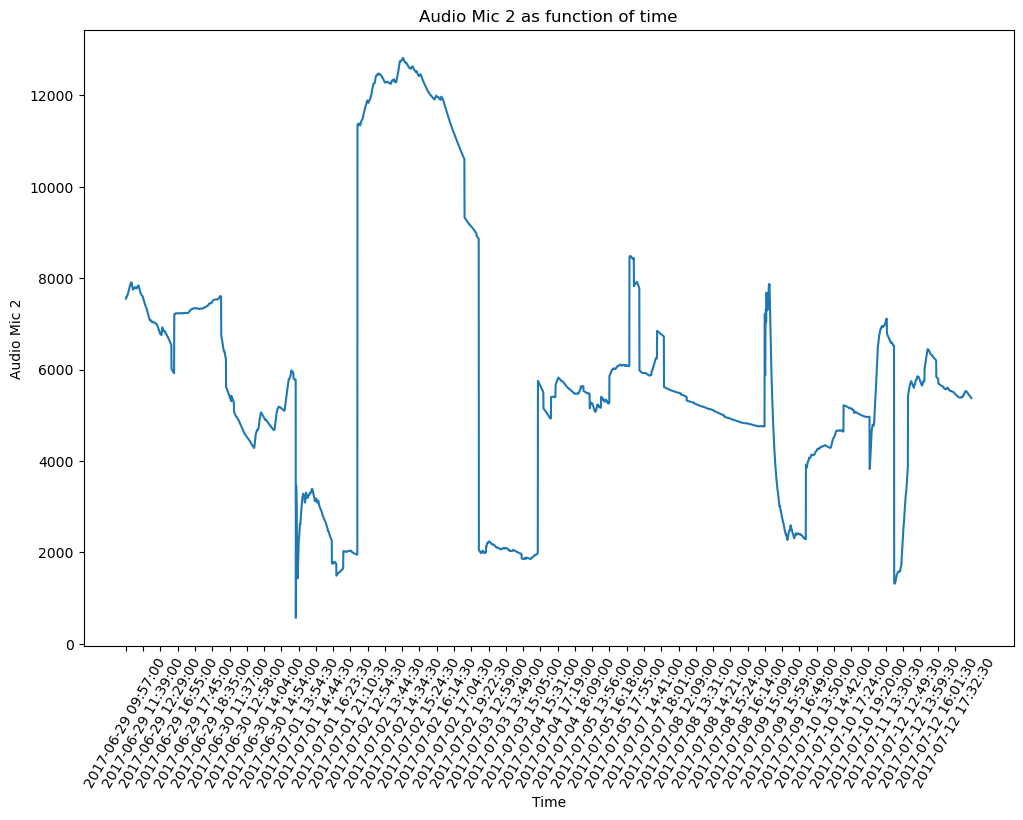

In [21]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['audio_mic_2'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Audio Mic 2')
plt.title('Audio Mic 2 as function of time')

Text(0.5, 1.0, 'Audio Mic 3 as function of time')

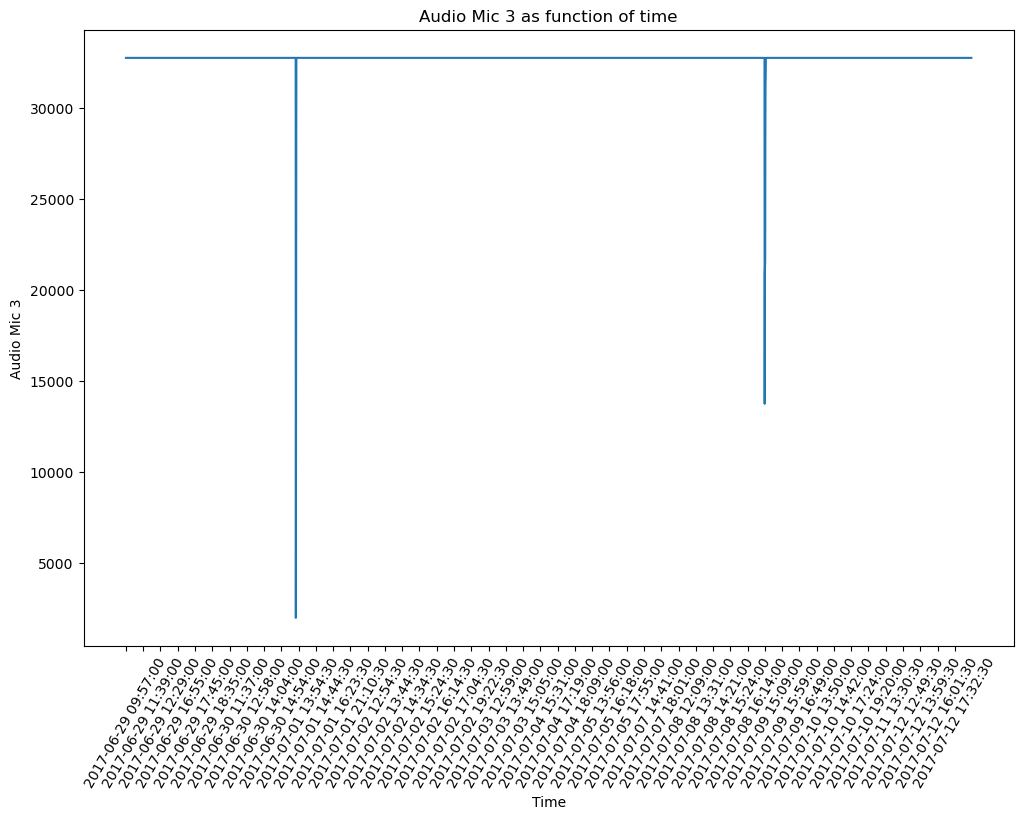

In [22]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['audio_mic_3'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Audio Mic 3')
plt.title('Audio Mic 3 as function of time')

Text(0.5, 1.0, 'Audio Mic 4 as function of time')

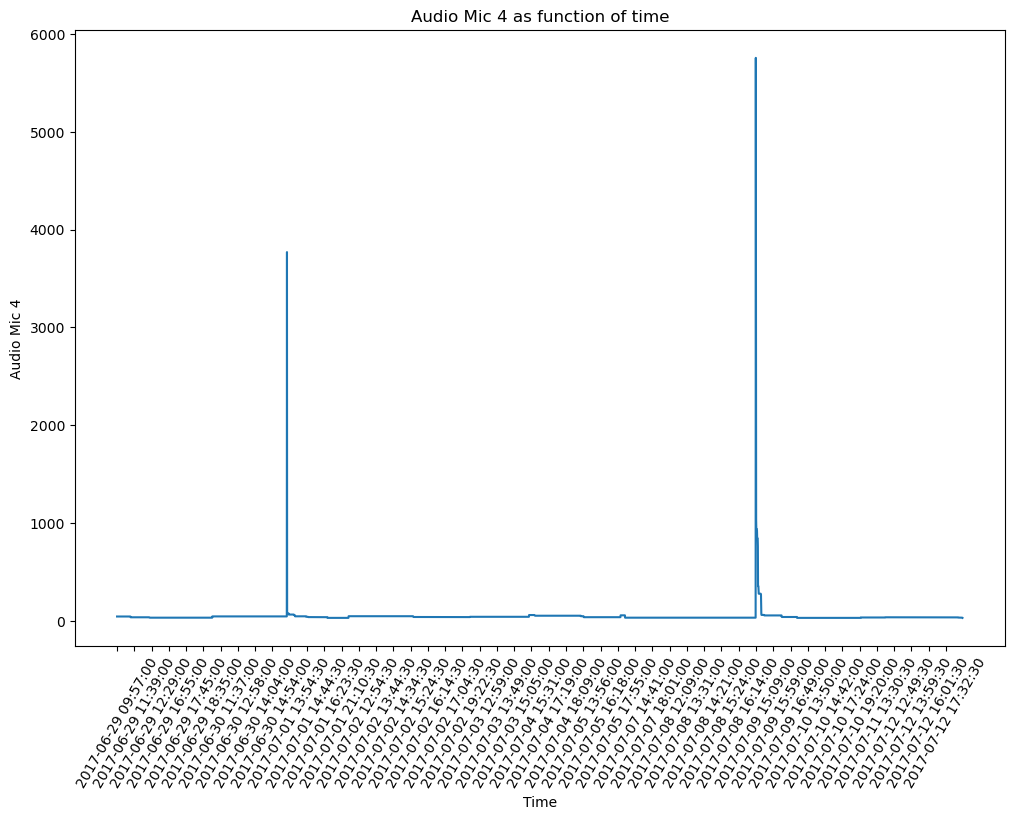

In [23]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['audio_mic_4'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Audio Mic 4')
plt.title('Audio Mic 4 as function of time')

Text(0.5, 1.0, 'Gravity as function of time')

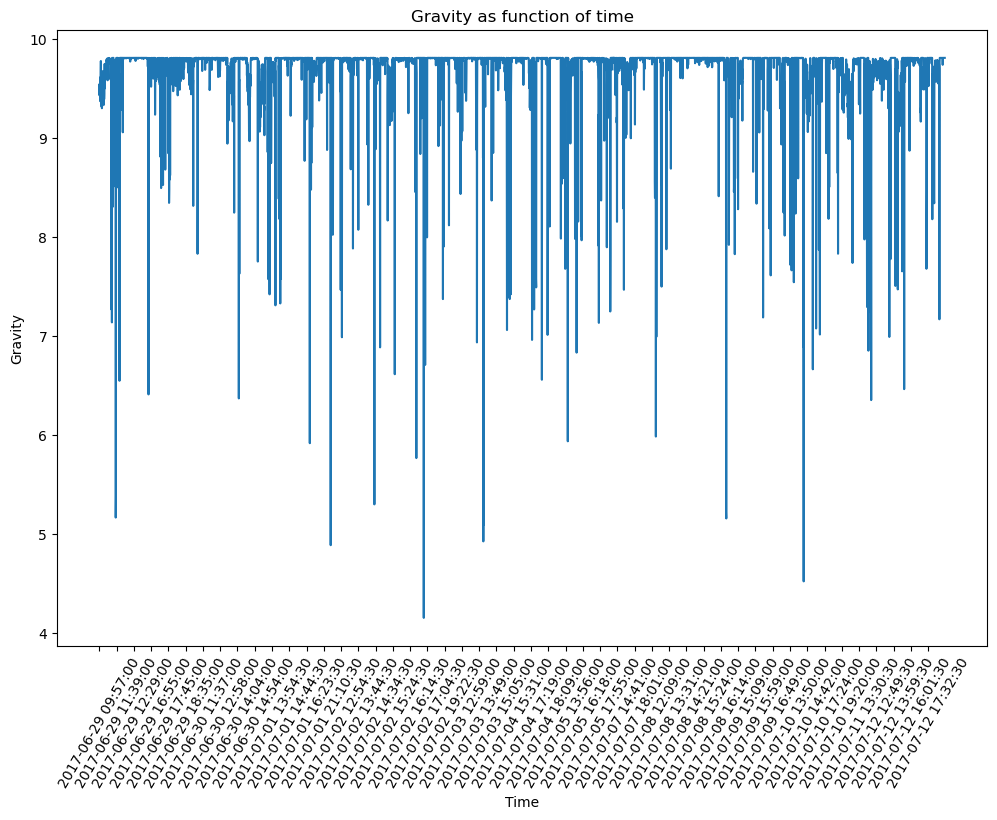

In [26]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['gravity'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Gravity')
plt.title('Gravity as function of time')

Text(0.5, 1.0, 'Linear Acceleration as function of time')

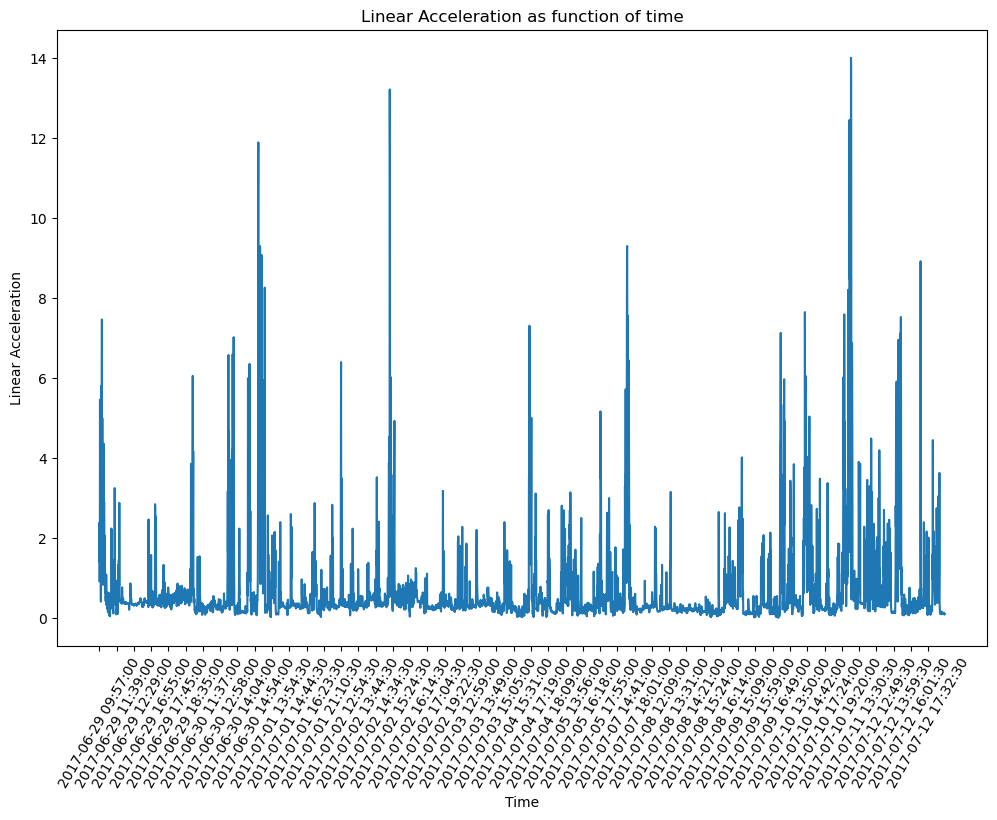

In [27]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['linear_acceleration'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('Linear Acceleration')
plt.title('Linear Acceleration as function of time')

Text(0.5, 1.0, 'pressure as function of time')

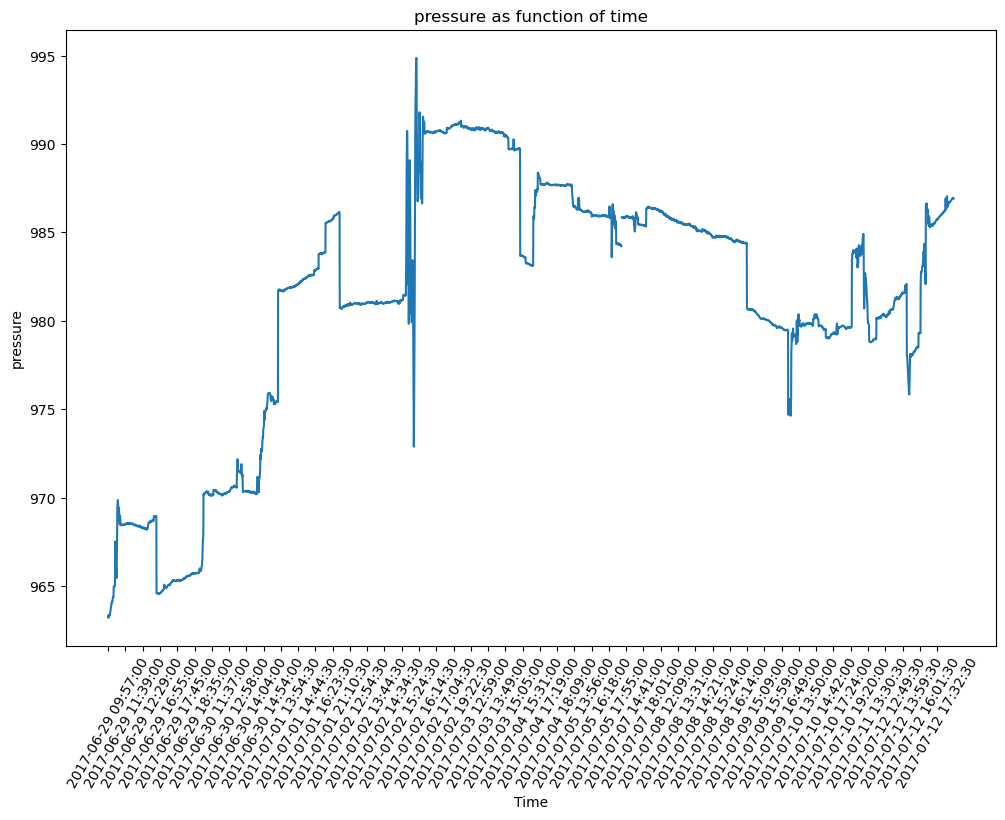

In [29]:
plt.figure(figsize=(12,8))
plt.plot(dataFrame['timestamp'],dataFrame['pressure'])
plt.xticks(dataFrame['timestamp'][::100],rotation=60)
plt.xlabel('Time')
plt.ylabel('pressure')
plt.title('pressure as function of time')

### Heatmap correlations

In [31]:
df = dataFrame.drop(columns=['Unnamed: 0','timestamp','index_activity'])

Text(0.5, 1.0, 'Correlations between different measurements')

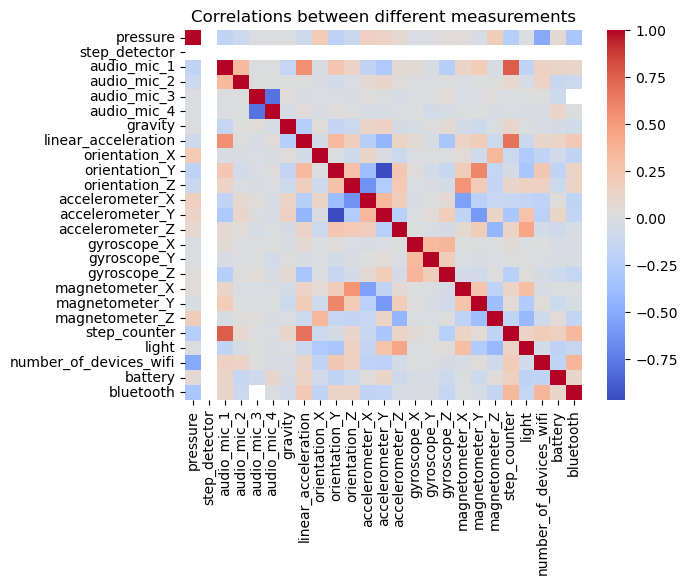

In [32]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlations between different measurements')

### Plots of measurments as a function of activity label

It is not expected that the step_detector probability is less than 50% in the activity 'walk', and beyond 50% in 'meeting'.

Text(0.5, 1.0, 'Probabilty for a step at each activity')

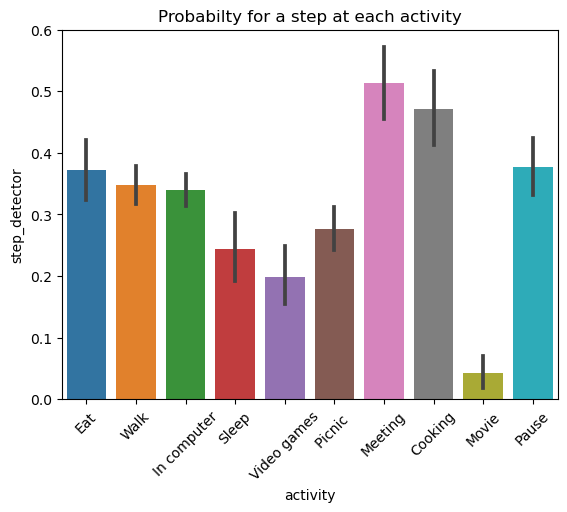

In [28]:
sns.barplot(x='activity',y='step_detector',data=df)
plt.xticks(rotation=45);
plt.title('Probabilty for a step at each activity')

Text(0.5, 1.0, 'Mean number of steps at each activity')

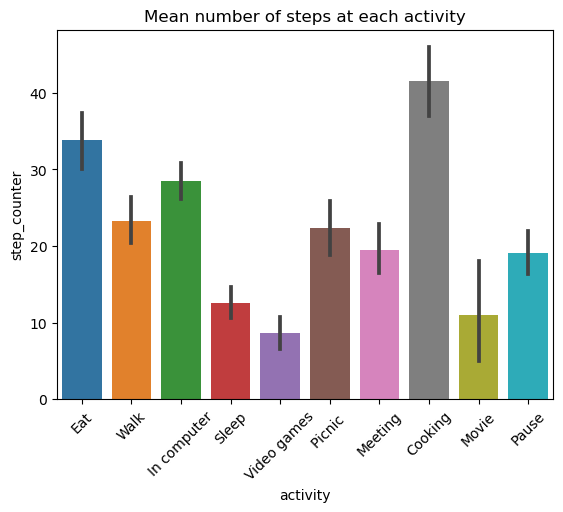

In [33]:
sns.barplot(x='activity',y='step_counter',data=df)
plt.xticks(rotation=45);
plt.title('Mean number of steps at each activity')

Text(0.5, 1.0, 'Pressure boxplot as a function of activity')

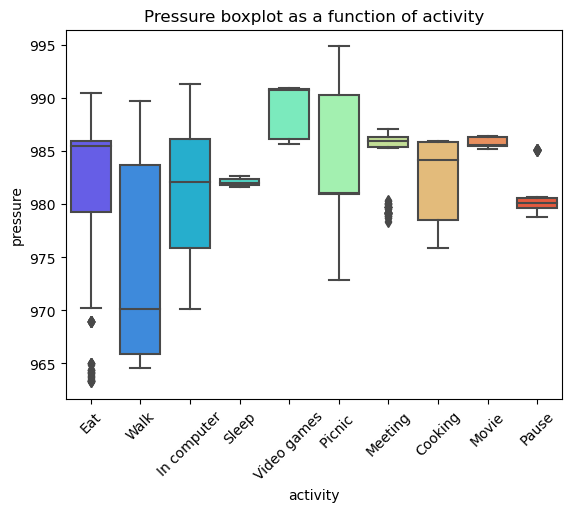

In [34]:
sns.boxplot(x="activity", y="pressure", data=df,palette='rainbow')
plt.xticks(rotation=45);
plt.title('Pressure boxplot as a function of activity')

The pressure has big variance when the person walk compared to sleep.


Text(0.5, 1.0, 'Battery barplot as a function of activity')

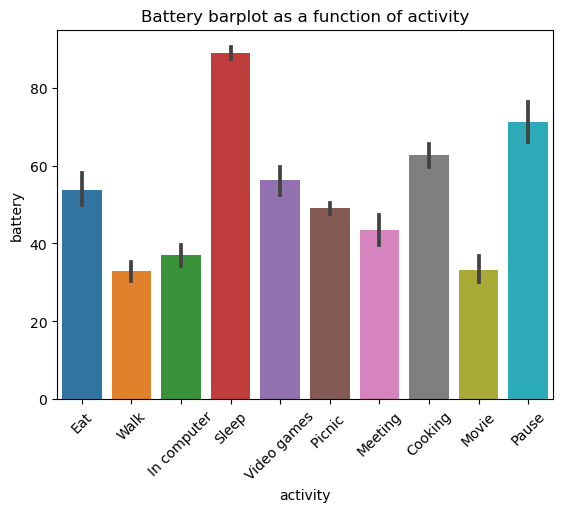

In [35]:
sns.barplot(x='activity',y='battery',data=df)
plt.xticks(rotation=45);
plt.title('Battery barplot as a function of activity')

Text(0.5, 1.0, 'Number of Wifi boxplot as a function of activity')

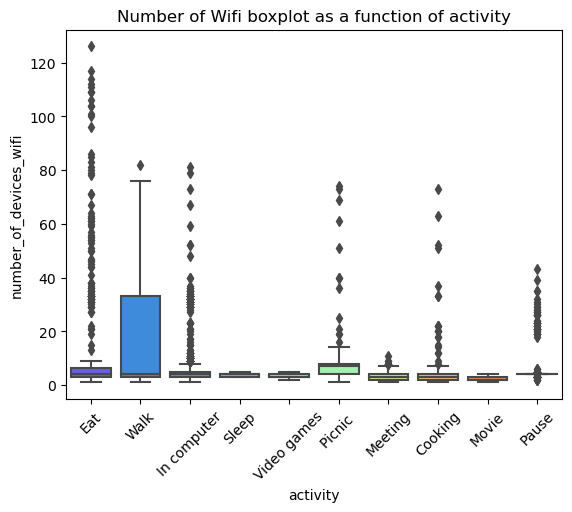

In [36]:
sns.boxplot(x="activity", y="number_of_devices_wifi", data=df,palette='rainbow')
plt.xticks(rotation=45);
plt.title('Number of Wifi boxplot as a function of activity')

Text(0.5, 1.0, 'Bluetooth boxplot as a function of activity')

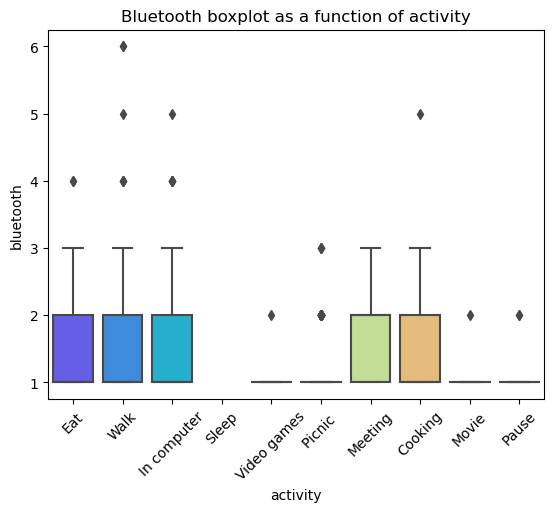

In [37]:
sns.boxplot(x="activity", y="bluetooth", data=df,palette='rainbow')
plt.xticks(rotation=45);
plt.title('Bluetooth boxplot as a function of activity')

### Closer look on correlations between features

Text(0.5, 0.98, 'Correlation between step counter and linear acceleration')

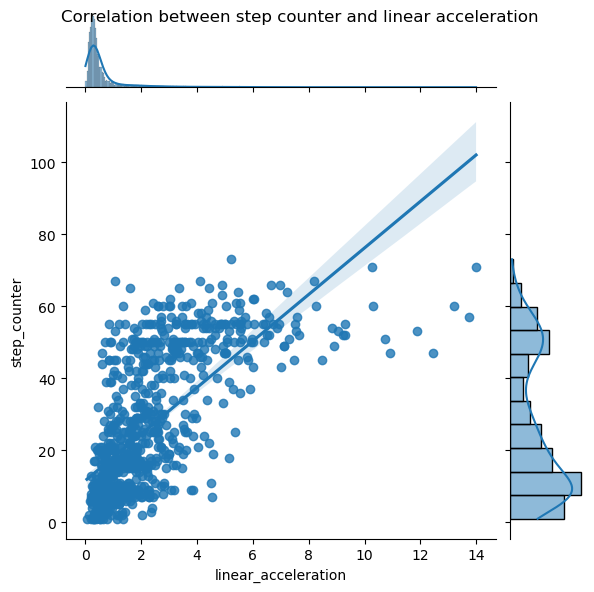

In [38]:
sns.jointplot(x='linear_acceleration',y='step_counter',data=df,kind='reg')
plt.suptitle('Correlation between step counter and linear acceleration')

Text(0.5, 0.98, 'Correlation between pressure and No. of wifi devices')

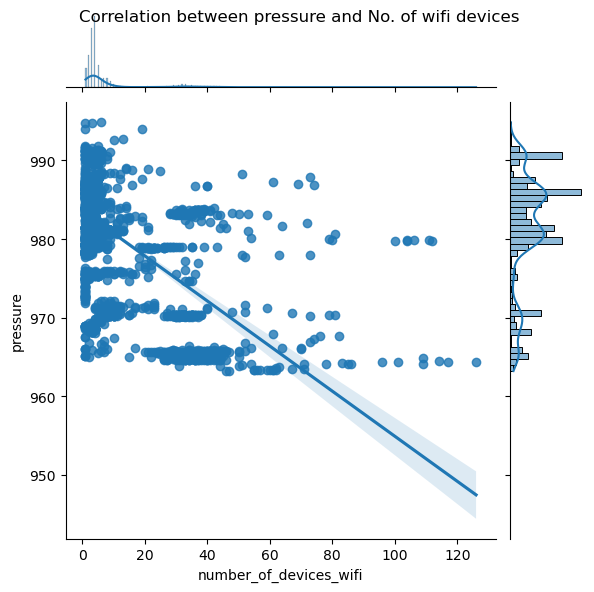

In [40]:
sns.jointplot(x='number_of_devices_wifi',y='pressure',data=df,kind='reg')
plt.suptitle('Correlation between pressure and No. of wifi devices')

### Distribution plots

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of gravity')

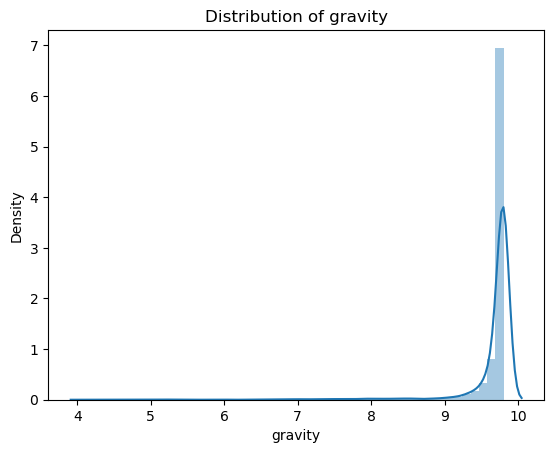

In [43]:
sns.distplot(df['gravity'])
plt.title('Distribution of gravity')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of number of wifi devices')

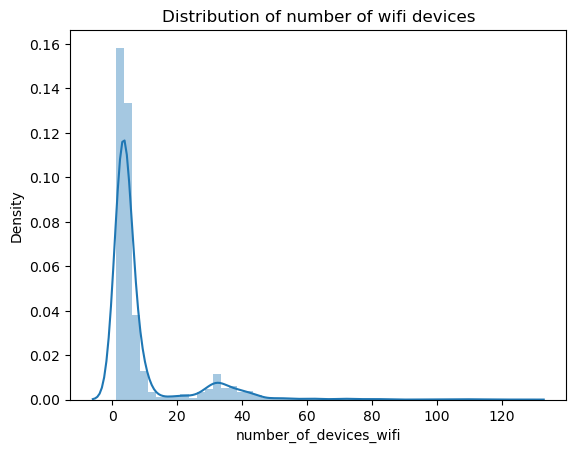

In [44]:
sns.distplot(df['number_of_devices_wifi'])
plt.title('Distribution of number of wifi devices')


## Some more visualizations

In [42]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\FinalFullDataAct.csv')
dataFrame = dataFrame.drop(columns=['Unnamed: 0','index','timestamp','index_activity','diffTimeSec'])

FeaturesTable = dataFrame.drop(columns=['activity'])
label = dataFrame['activity']

FeaturesTable_lessFeatures = dataFrame.copy(deep=True)
print(f"Feature list:\n{FeaturesTable.columns}")
FeaturesTable_lessFeatures = FeaturesTable_lessFeatures.drop(columns=["audio_mic_3", "audio_mic_4", 
                                                                      'orientation_Y', 'orientation_Z',
                                                                      'accelerometer_Y', 'accelerometer_Z',
                                                                      'gyroscope_Y', 'gyroscope_Z',
                                                                      'magnetometer_Y', 'magnetometer_Z'])
print(f"\nFeature list After removing some features:\n{FeaturesTable_lessFeatures.columns}")

# FeaturesTable.head()
# label.head()


Feature list:
Index(['level_0', 'pressure', 'step_detector', 'audio_mic_1', 'audio_mic_2',
       'audio_mic_3', 'audio_mic_4', 'gravity', 'linear_acceleration',
       'orientation_X', 'orientation_Y', 'orientation_Z', 'accelerometer_X',
       'accelerometer_Y', 'accelerometer_Z', 'gyroscope_X', 'gyroscope_Y',
       'gyroscope_Z', 'magnetometer_X', 'magnetometer_Y', 'magnetometer_Z',
       'number_of_devices_wifi', 'battery', 'bluetooth'],
      dtype='object')

Feature list After removing some features:
Index(['level_0', 'pressure', 'activity', 'step_detector', 'audio_mic_1',
       'audio_mic_2', 'gravity', 'linear_acceleration', 'orientation_X',
       'accelerometer_X', 'gyroscope_X', 'magnetometer_X',
       'number_of_devices_wifi', 'battery', 'bluetooth'],
      dtype='object')


orientation_Y        magnetometer_Y         0.595239
                     step_detector          0.556464
audio_mic_1          linear_acceleration    0.552769
magnetometer_X       orientation_Z          0.537267
linear_acceleration  step_detector          0.500081
dtype: float64
accelerometer_X  magnetometer_X    -0.559234
magnetometer_Y   accelerometer_Y   -0.590458
orientation_Z    accelerometer_X   -0.627214
audio_mic_4      audio_mic_3       -0.781203
orientation_Y    accelerometer_Y   -0.964430
dtype: float64


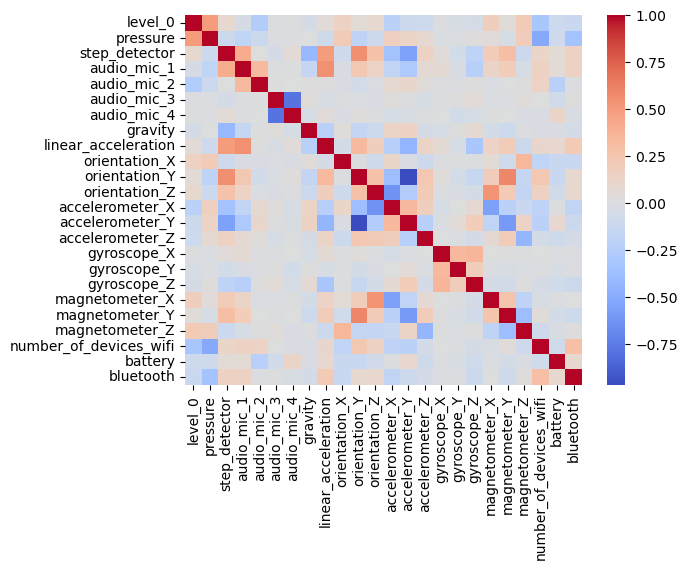

In [46]:
# Correlation heat map
# # plt.figure(figsize=(10, 8))
corr_matrix = FeaturesTable.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")

# Find most corr features:
N = 5  # Change N to the desired number of top correlations
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(ascending=False).drop_duplicates()
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs.index.get_level_values(0) != sorted_corr_pairs.index.get_level_values(1)]
top_N_corr_pairs = sorted_corr_pairs.head(N)
least_N_corr_pairs = sorted_corr_pairs.tail(N)

print(top_N_corr_pairs)
print(least_N_corr_pairs)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

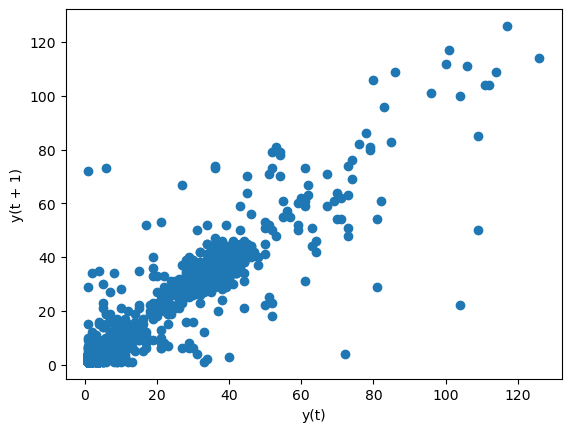

In [44]:
# Lag Plot: Plot a feature against its lagged version to check for autocorrelation.
pd.plotting.lag_plot(FeaturesTable['number_of_devices_wifi'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

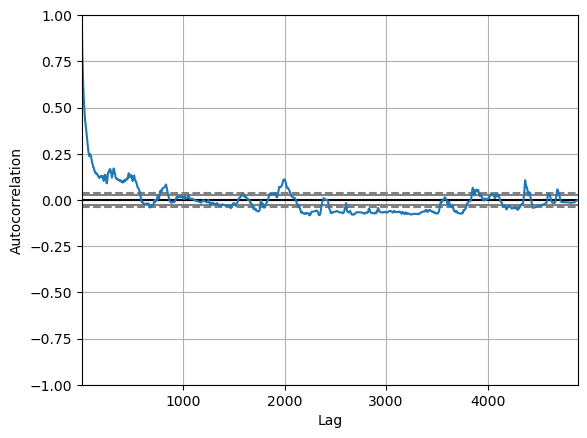

In [45]:
# Autocorrelation Plot: Visualize autocorrelation in the time series.
pd.plotting.autocorrelation_plot(FeaturesTable['number_of_devices_wifi'])